# Unsupervised Learning

##### Dataset: Mall Customer Segmentation Data

In [1]:
# Importing Pandas library
import pandas as pd
# Importing Numpy library
import numpy as np
# Importing matplotlib.pyplot for drawing graph
import matplotlib.pyplot as plt
# For plotting the dataset in seaborn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import plotly.express as px
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
# insert only .csv file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 3981 bytes


In [3]:
import io
mall_customer_df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [4]:
# Checking if the dataframe is stored correctly
mall_customer_df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


##Pre-Analytics Data

In [5]:
# checking the number of columns, column labels, column data types, memory usage,
# range index, and the number of cells in each column (non-null values) in the penguin dataset.
mall_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Renaming the Annual Income (k$) to Annual_Income, Spending Score (1-100) to Spending_Score
mall_customer_df.rename(index=str, columns={'Annual Income (k$)': 'Annual_Income',
                              'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
mall_customer_df.head(10)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
# checking the number of null values each columns have
mall_customer_df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [8]:
# Outlier Removal by z score treatment
# Calculating the boundary values:
features = ['Annual_Income', 'Spending_Score']
for column_mall_customer in mall_customer_df[features]:
  print("Highest allowed in {} is: {}".format(column_mall_customer, mall_customer_df[column_mall_customer].mean() + 3 * mall_customer_df[column_mall_customer].std()))
  print("Lowest allowed in {} is: {}\n\n".format(column_mall_customer, mall_customer_df[column_mall_customer].mean() - 3 * mall_customer_df[column_mall_customer].std()))

Highest allowed in Annual_Income is: 139.35416349581374
Lowest allowed in Annual_Income is: -18.234163495813732


Highest allowed in Spending_Score is: 127.67056500511052
Lowest allowed in Spending_Score is: -27.270565005110512




In [9]:
# Finding out the outliers in the mall customer dataset
print(mall_customer_df[(mall_customer_df['Annual_Income'] > 139.35416349581376) | (mall_customer_df['Annual_Income'] < -18.23416349581376)])
print(mall_customer_df[(mall_customer_df['Spending_Score'] > 127.67056500511049) | (mall_customer_df['Spending_Score'] < -27.270565005110484)])
# all of them return as empty dataframe which means that the dataset does not have any outliers

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual_Income, Spending_Score]
Index: []
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual_Income, Spending_Score]
Index: []


## Exploring Data


In [10]:
value_gender = mall_customer_df.Gender.value_counts()
value_gender

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
fig = px.pie(mall_customer_df, values="Age", names = "Gender", title='Percentage of Gender',
             width=600,height=400, color = "Gender",
             color_discrete_map={
                                 'Male':'cyan',
                                 'Female':'royalblue'})
fig.show()

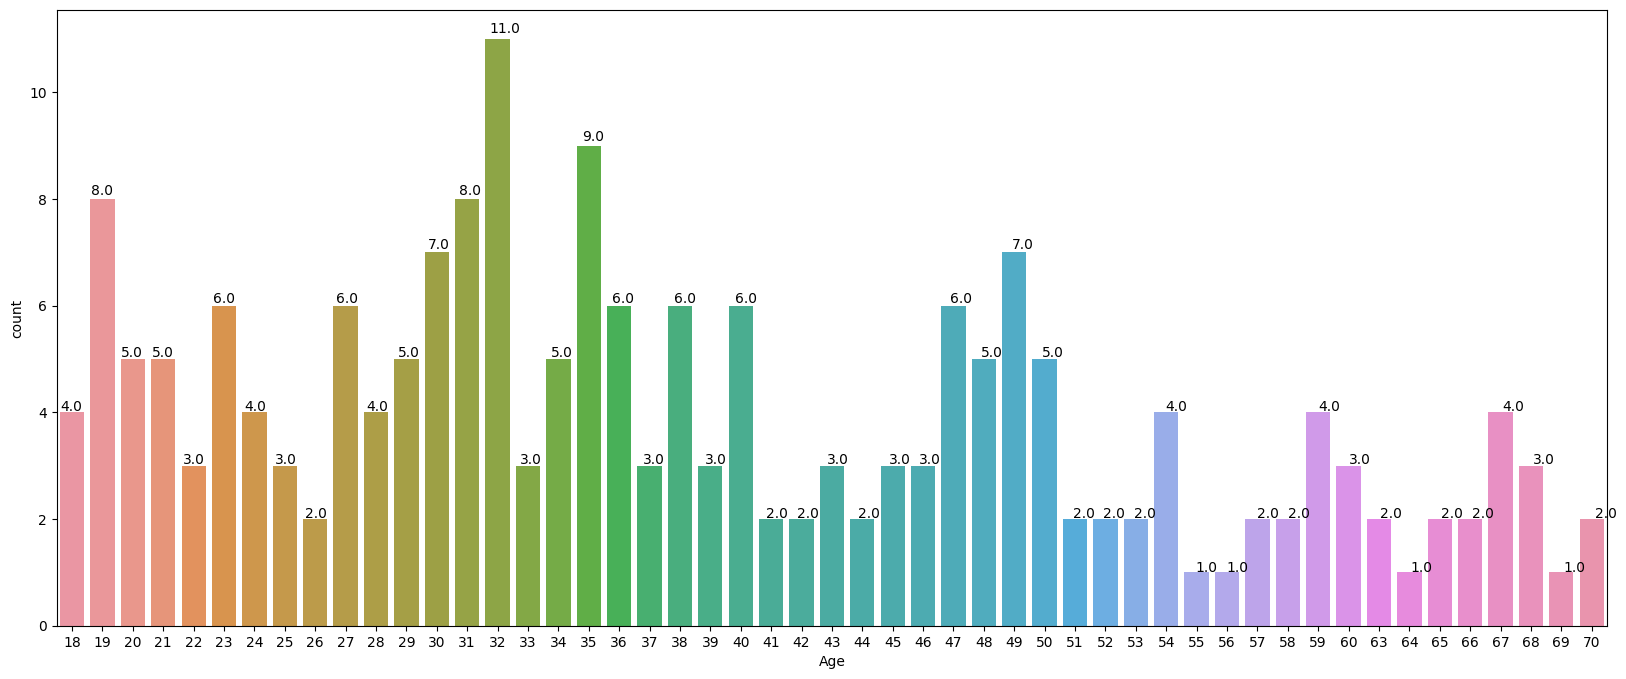

In [12]:
plt.figure(figsize = (20, 8))
gender = mall_customer_df['Age'].sort_values(ascending = False)
ax = sns.countplot(x='Age', data = mall_customer_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()
# The data set consists of customer of age ranging from 18 to 70 years old

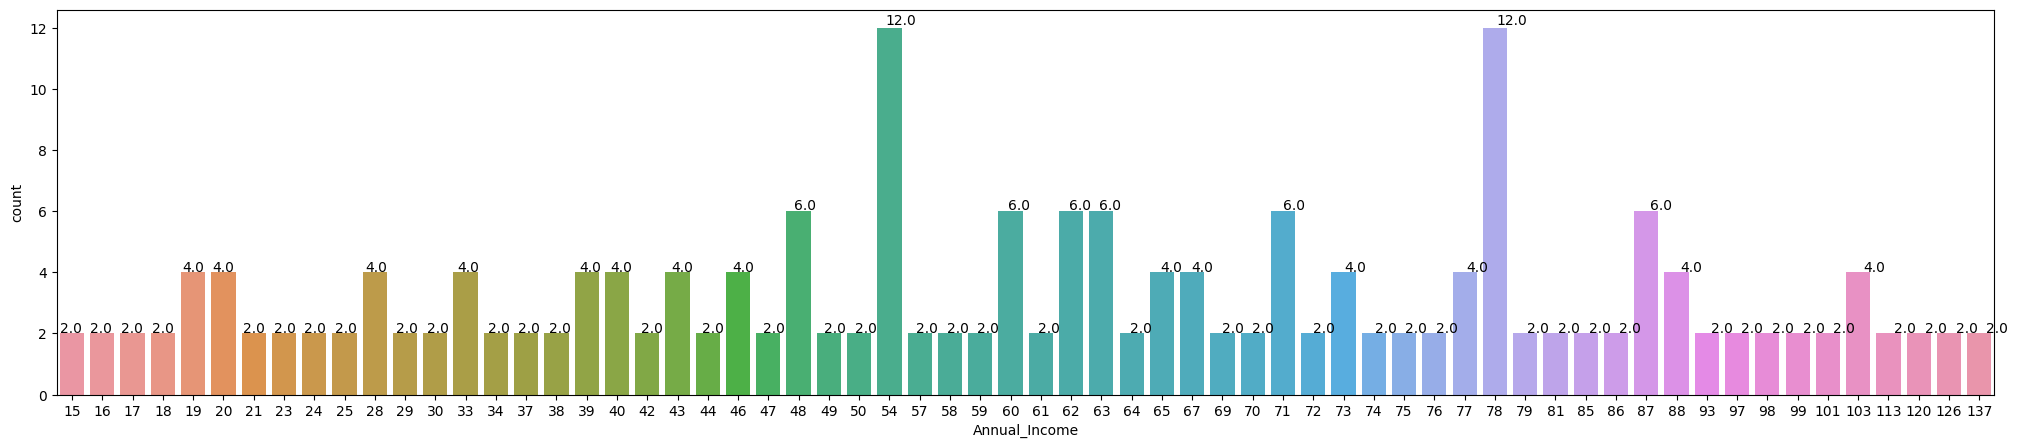

In [13]:
plt.figure(figsize = (25,5))
gender = mall_customer_df['Annual_Income'].sort_values(ascending = False)
ax = sns.countplot(x='Annual_Income', data= mall_customer_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()
# The data set consists of customer of annual income ranging from 15k to 135k USD

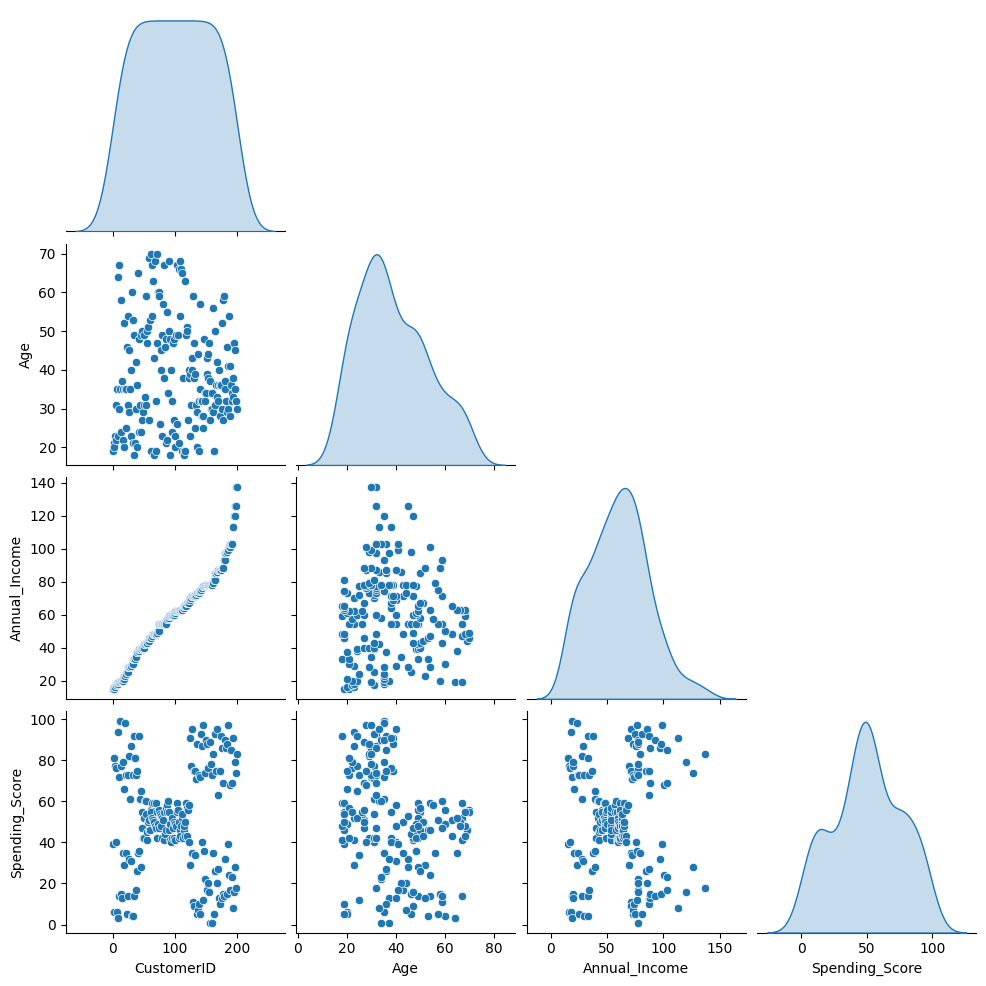

In [14]:
sns.pairplot(mall_customer_df,corner=True,diag_kind="kde")
plt.show()

##Feature Selection


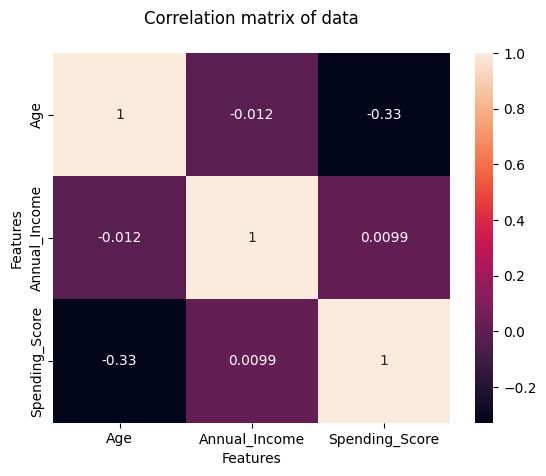

In [15]:
# Heatmap of correlation matrix
features = ['Age','Annual_Income', 'Spending_Score']
corelation = mall_customer_df[features].corr()
heatmap = sns.heatmap(corelation, annot = True)
heatmap.set(xlabel='Features', ylabel='Features', title = "Correlation matrix of data\n")
plt.show()

In [16]:
# Droping the 'CustomerID', 'Gender', 'Age' values
# Age because in the above heatmap, age has negative correlation
mall_customer_df_feature = mall_customer_df
mall_customer_df_feature.drop(['CustomerID', 'Gender', 'Age'], inplace=True, axis=1)

In [17]:
# For feature selection
from sklearn.ensemble import ExtraTreesClassifier
# Using feature importance
train_data = mall_customer_df.values
X = train_data[:,0:2]
Y = train_data[:,1]
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.32563091 0.67436909]


## Unsupervised Learning (KMeans)

In [18]:
mix_max_scaler = MinMaxScaler()
mix_max_scaler.fit(mall_customer_df[['Annual_Income']])
mall_customer_df[['Annual_Income']] = mix_max_scaler.transform(mall_customer_df[['Annual_Income']])
mix_max_scaler.fit(mall_customer_df[['Spending_Score']])
mall_customer_df[['Spending_Score']] = mix_max_scaler.transform(mall_customer_df[['Spending_Score']])
mall_customer_df

,Annual_Income,Spending_Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [19]:
km = KMeans(n_clusters = 5)
y_predicted = km.fit_predict(mall_customer_df[['Annual_Income', 'Spending_Score']])
print(y_predicted)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [20]:
mall_customer_df['Cluster'] = y_predicted
mall_customer_df.head(10)

,Annual_Income,Spending_Score,Cluster
0,0.000000,0.387755,0
1,0.000000,0.816327,4
2,0.008197,0.051020,0
3,0.008197,0.775510,4
4,0.016393,0.397959,0
5,0.016393,0.765306,4
6,0.024590,0.051020,0
7,0.024590,0.948980,4
8,0.032787,0.020408,0
9,0.032787,0.724490,4


In [21]:
km.cluster_centers_

array([[0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.08792846, 0.79962894]])

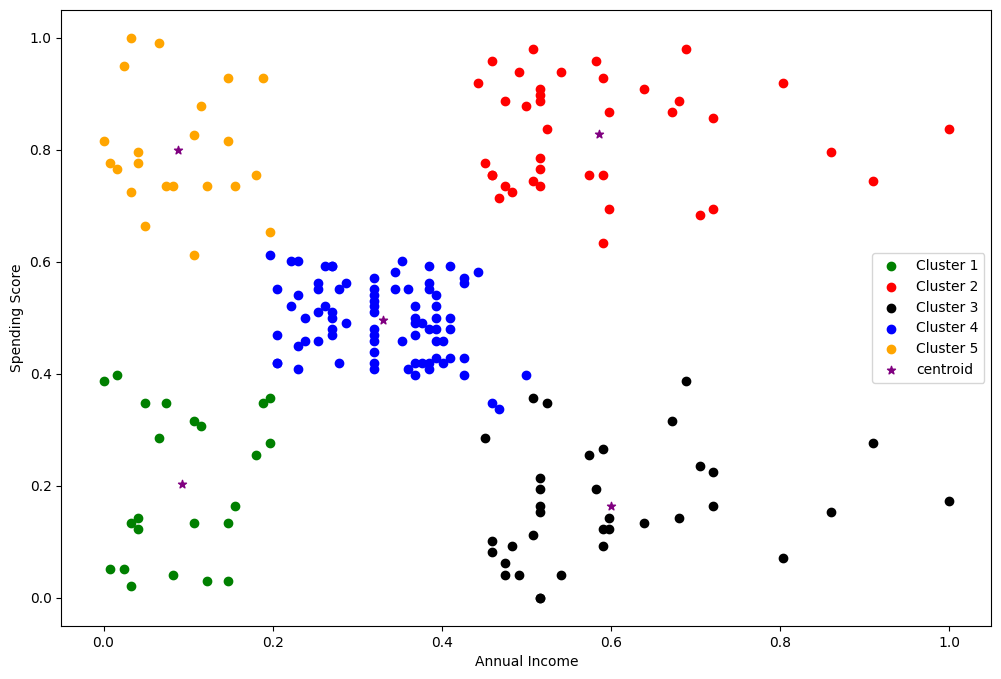

In [22]:
df1 = mall_customer_df[mall_customer_df.Cluster == 0]
df2 = mall_customer_df[mall_customer_df.Cluster == 1]
df3 = mall_customer_df[mall_customer_df.Cluster == 2]
df4 = mall_customer_df[mall_customer_df.Cluster == 3]
df5 = mall_customer_df[mall_customer_df.Cluster == 4]
plt.figure(figsize = (12,8))
plt.scatter(df1['Annual_Income'], df1['Spending_Score'], color = 'green', label = 'Cluster 1')
plt.scatter(df2['Annual_Income'], df2['Spending_Score'], color = 'red', label = 'Cluster 2')
plt.scatter(df3['Annual_Income'], df3['Spending_Score'], color = 'black', label = 'Cluster 3')
plt.scatter(df4['Annual_Income'], df4['Spending_Score'], color = 'blue', label = 'Cluster 4')
plt.scatter(df5['Annual_Income'], df5['Spending_Score'], color = 'orange', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Optimization

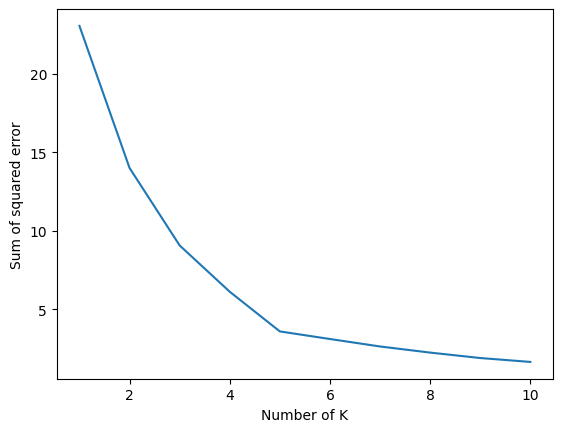

In [23]:
# Using Elbow method

k_range = range(1, 11)
cluster = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(mall_customer_df[['Annual_Income', 'Spending_Score']])
    cluster.append(km.inertia_)

plt.xlabel('Number of K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, cluster)
plt.show()

In [ ]:
# Using Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
results = {}

x = mall_customer_df[['Annual_Income', 'Spending_Score']]

for k in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state = 42)
    labels = kmeans.fit_predict(X)
    Calinski_Harabasz_index = calinski_harabasz_score(x, labels)
    results.update({k: Calinski_Harabasz_index})

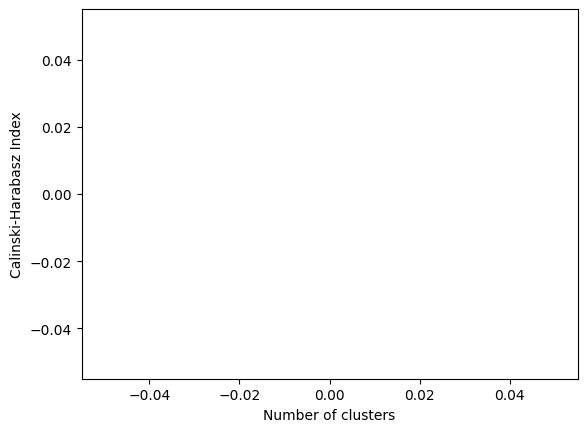

In [25]:
plt.plot(list(results.keys()), list(results.values()), marker = 'o', markerfacecolor='red')
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()